In [1]:
'''
Pandas Homework with IMDb data
'''

'\nPandas Homework with IMDb data\n'

In [62]:
'''
BASIC LEVEL
'''

import pandas as pd
import matplotlib.pyplot as plt

# display plots in the notebook
%matplotlib inline

# increase default figure and font sizes for easier viewing
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

In [63]:
# read in 'imdb_1000.csv' and store it in a DataFrame named movies

fname = r'f:\Git_Repositories\DAT-DC-9\data\imdb_1000.csv'
movies = pd.read_table(fname,
                       sep = ',')

movies.head()


,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [64]:
# check the number of rows and columns
movies.shape

(979, 6)

In [65]:
# check the data type of each column
movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

In [66]:
# calculate the average movie duration
movies.duration.mean()

120.97957099080695

In [67]:
# sort the DataFrame by duration to find the shortest and longest movies

# If there were many movies you might do:
shortest = movies.duration.order().head(1)
longest = movies.duration.order().tail(1)
print(shortest,'\n', longest)

# Otherwise, you could just look at the data in a list like:
movies.duration.order().values

389    64
Name: duration, dtype: int64 
 476    242
Name: duration, dtype: int64


array([ 64,  66,  67,  68,  68,  69,  70,  75,  75,  76,  78,  78,  78,
        79,  80,  80,  80,  80,  80,  80,  81,  81,  81,  81,  81,  82,
        82,  83,  83,  83,  83,  83,  84,  84,  84,  85,  85,  85,  85,
        85,  85,  85,  85,  85,  86,  86,  86,  86,  87,  87,  87,  87,
        87,  88,  88,  88,  88,  88,  88,  88,  88,  88,  88,  88,  89,
        89,  89,  89,  89,  89,  89,  89,  90,  90,  90,  90,  90,  90,
        90,  91,  91,  91,  91,  91,  91,  91,  92,  92,  92,  92,  92,
        92,  92,  92,  92,  92,  92,  92,  92,  93,  93,  93,  93,  93,
        93,  93,  93,  93,  93,  93,  93,  93,  93,  94,  94,  94,  94,
        94,  94,  94,  94,  94,  94,  94,  94,  94,  94,  95,  95,  95,
        95,  95,  95,  95,  96,  96,  96,  96,  96,  96,  96,  96,  96,
        96,  96,  96,  96,  96,  96,  96,  97,  97,  97,  97,  97,  97,
        97,  97,  97,  97,  98,  98,  98,  98,  98,  98,  98,  98,  98,
        98,  98,  98,  98,  98,  98,  98,  98,  98,  99,  99,  9

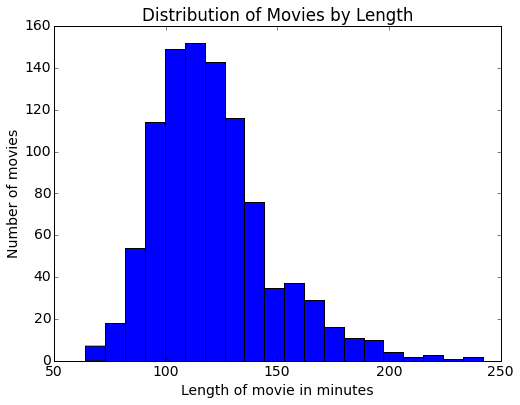

In [68]:
# create a histogram of duration, choosing an "appropriate" number of bins
movies.duration.plot(kind = 'hist', bins=20, title='Distribution of Movies by Length')
plt.xlabel('Length of movie in minutes')
plt.ylabel('Number of movies')

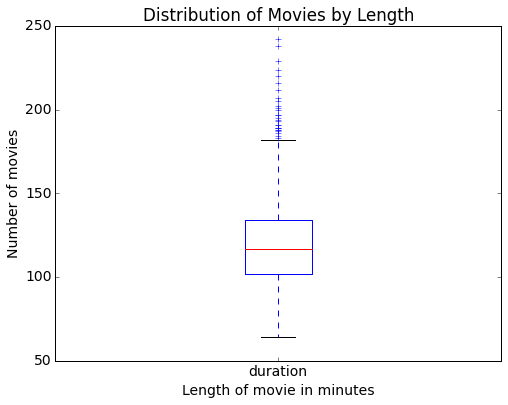

In [69]:
# use a box plot to display that same data
movies.duration.plot(kind = 'box', title='Distribution of Movies by Length')
plt.xlabel('Length of movie in minutes')
plt.ylabel('Number of movies')

In [70]:
'''
INTERMEDIATE LEVEL
'''

# count how many movies have each of the content ratings
movies.content_rating.value_counts()

R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
PASSED         7
NC-17          7
X              4
GP             3
TV-MA          1
dtype: int64

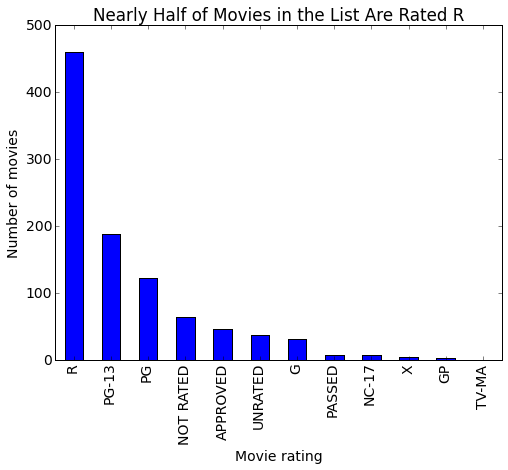

In [71]:
# use a visualization to display that same data, including a title and x and y labels
movies.content_rating.value_counts().plot(kind='bar',title='Nearly Half of Movies in the List Are Rated R')
plt.xlabel('Movie rating')
plt.ylabel('Number of movies')

In [72]:
# convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP
movies.content_rating.replace(to_replace=['NOT RATED','APPROVED','PASSED','GP'],value='UNRATED',inplace=True)

In [73]:
# convert the following content ratings to "NC-17": X, TV-MA
movies.content_rating.replace(to_replace=['X','TV-MA'],value='NC-17',inplace=True)

#I used this next line to check that the above two lines of code worked.
movies.content_rating.value_counts()

R          460
PG-13      189
UNRATED    160
PG         123
G           32
NC-17       12
dtype: int64

In [74]:
# count the number of missing values in each column
movies.isnull().sum()

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

In [75]:
# if there are missing values: examine them, then fill them in with "reasonable" values
movies.content_rating.fillna("PG-13",inplace=True)

#The next two lines double check my work.
movies.content_rating.value_counts()
movies.isnull().sum()

star_rating       0
title             0
content_rating    0
genre             0
duration          0
actors_list       0
dtype: int64

In [76]:
# calculate the average star rating for movies 2 hours or longer,
# and compare that with the average star rating for movies shorter than 2 hours

long_m = movies[movies.duration >= 120].star_rating.mean()
short_m = movies[movies.duration < 120].star_rating.mean()
print('Average star rating of movies two hours or longer: ',round(long_m,3))
print('Average star rating of movies less than two hours: ',round(short_m,3))


Average star rating of movies two hours or longer:  7.949
Average star rating of movies less than two hours:  7.839


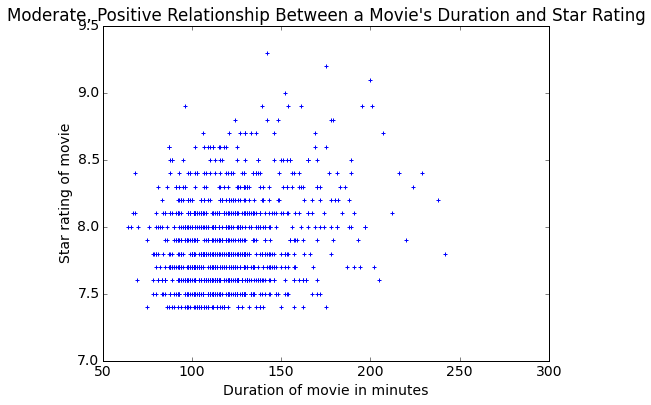

In [77]:
# use a visualization to detect whether there is a relationship between duration and star rating
movies.plot(kind='scatter',x='duration',y='star_rating',marker='+',title="Moderate, Positive Relationship Between a Movie's Duration and Star Rating")
plt.xlabel('Duration of movie in minutes')
plt.ylabel('Star rating of movie')

In [78]:
# calculate the average duration for each genre
movies.groupby('genre').duration.mean()

genre
Action       126.485294
Adventure    134.840000
Animation     96.596774
Biography    131.844156
Comedy       107.602564
Crime        122.298387
Drama        126.539568
Family       107.500000
Fantasy      112.000000
Film-Noir     97.333333
History       66.000000
Horror       102.517241
Mystery      115.625000
Sci-Fi       109.000000
Thriller     114.200000
Western      136.666667
Name: duration, dtype: float64

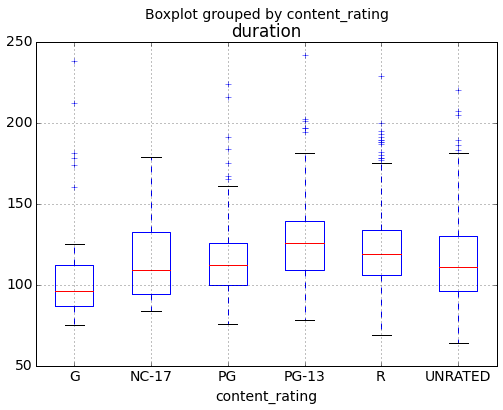

In [79]:
'''
ADVANCED LEVEL
'''

# visualize the relationship between content rating and duration
movies.boxplot(column='duration', by='content_rating')

In [80]:
# determine the top rated movie (by star rating) for each genre

movies[movies['star_rating'] == movies.groupby('genre')['star_rating'].transform(max)]

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
5,8.9,12 Angry Men,UNRATED,Drama,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."
6,8.9,"The Good, the Bad and the Ugly",UNRATED,Western,161,"[u'Clint Eastwood', u'Eli Wallach', u'Lee Van ..."
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
8,8.9,Schindler's List,R,Biography,195,"[u'Liam Neeson', u'Ralph Fiennes', u'Ben Kings..."
9,8.9,Fight Club,R,Drama,139,"[u'Brad Pitt', u'Edward Norton', u'Helena Bonh..."
25,8.6,Life Is Beautiful,PG-13,Comedy,116,"[u'Roberto Benigni', u'Nicoletta Braschi', u'G..."
29,8.6,City Lights,UNRATED,Comedy,87,"[u'Charles Chaplin', u'Virginia Cherrill', u'F..."
30,8.6,Spirited Away,PG,Animation,125,"[u'Daveigh Chase', u'Suzanne Pleshette', u'Miy..."


In [81]:
# check if there are multiple movies with the same title, and if so, determine if they are actually duplicates

duplicates = movies[movies.duplicated('title')].title
movies[movies.title.isin(duplicates)].sort('title')

#None of them is a duplicate, but instead are remakes of the same movie.


,star_rating,title,content_rating,genre,duration,actors_list
703,7.6,Dracula,UNRATED,Horror,85,"[u'Bela Lugosi', u'Helen Chandler', u'David Ma..."
905,7.5,Dracula,R,Horror,128,"[u'Gary Oldman', u'Winona Ryder', u'Anthony Ho..."
678,7.7,Les Miserables,PG-13,Drama,158,"[u'Hugh Jackman', u'Russell Crowe', u'Anne Hat..."
924,7.5,Les Miserables,PG-13,Crime,134,"[u'Liam Neeson', u'Geoffrey Rush', u'Uma Thurm..."
482,7.8,The Girl with the Dragon Tattoo,R,Crime,152,"[u'Michael Nyqvist', u'Noomi Rapace', u'Ewa Fr..."
466,7.9,The Girl with the Dragon Tattoo,R,Crime,158,"[u'Daniel Craig', u'Rooney Mara', u'Christophe..."
936,7.4,True Grit,PG-13,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"
662,7.7,True Grit,PG-13,Adventure,110,"[u'Jeff Bridges', u'Matt Damon', u'Hailee Stei..."


In [127]:
# calculate the average star rating for each genre, but only include genres with at least 10 movies


In [128]:
# option 1: manually create a list of relevant genres, then filter using that list
movies.groupby('genre').genre.count()
pop_genre = ['Action','Adventure','Animation','Biography','Comedy','Crime','Drama','Horror','Mystery']
movies[movies['genre'].isin(pop_genre)].groupby('genre').star_rating.mean()

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

In [157]:
# option 2: automatically create a list of relevant genres by saving the value_counts and then filtering
num_movies = movies.genre.value_counts()
pop_genre2 = num_movies[num_movies >= 10].index
movies[movies['genre'].isin(pop_genre2)].groupby('genre').star_rating.mean()

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

In [171]:
# option 3: calculate the average star rating for all genres, then filter using a boolean Series
avg_st_rat = movies.groupby('genre').star_rating.mean()
bool_counts = movies.genre.value_counts() >= 10
avg_st_rat[bool_counts]

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

In [179]:
# option 4: aggregate by count and mean, then filter using the count
aggregate = movies.groupby('genre').star_rating.agg(['count','mean'])
aggregate[aggregate['count'] >= 10]

,count,mean
genre,,
Action,136,7.884559
Adventure,75,7.933333
Animation,62,7.914516
Biography,77,7.862338
Comedy,156,7.822436
Crime,124,7.916935
Drama,278,7.902518
Horror,29,7.806897
Mystery,16,7.975000


In [255]:
'''
BONUS
'''
#Robert DeNiro has been in the most movies on this list!

actors = movies['actors_list']
x = list(actors.values.flatten())
y = [row.split(',') for row in x]
new_list=[]
for row in y:
    for actor in row:
        #actor.replace('"','').replace('[','').replace(']','')
        new_list.append(actor)
        
yy = [actor.replace(' ','').replace('[','').replace(']','') for actor in new_list]
        
actors_df = pd.DataFrame({'actors':yy})
actors_df.actors.value_counts()
        
        
#yy = y[0].replace('"').replace('[').replace(']')

u'RobertDeNiro'         18
u'TomHanks'             14
u'ClintEastwood'        14
u'BradPitt'             14
u'AlPacino'             13
u'JohnnyDepp'           12
u'ChristianBale'        11
u'LeonardoDiCaprio'     11
u'DustinHoffman'        11
u'JulianneMoore'        10
u'DenzelWashington'     10
u'HarrisonFord'         10
u'JamesStewart'         10
u'RussellCrowe'          9
u'EdHarris'              9
u'JackNicholson'         9
u'SeanConnery'           9
u'EthanHawke'            9
u'BruceWillis'           8
u'MorganFreeman'         8
u'CaryGrant'             8
u'JakeGyllenhaal'        8
u'TomCruise'             8
u'KateWinslet'           8
u'SeanPenn'              8
u'IanMcKellen'           8
u'MichaelCaine'          8
u'RobertDowneyJr.'       8
u'MattDamon'             8
u'JenniferConnelly'      7
                        ..
u'BobGunton'             1
u'AmyRyan'               1
u'RexHarrison'           1
u'JudithVittet'          1
u'FedericoLuppi'         1
u'Siu-WongFan'           1
u